In [4]:

import pandas as pd

df = pd.read_csv("../data/Titanic_train data.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
df.groupby('Sex')['Survived'].mean()

# 여성 생존률이 남성보다 4배 높다.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
df.groupby('Pclass')['Survived'].mean()

# 1등성 생존률이 가장 높고, 등급이 낮아질 수록 생존률도 감소한다.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Survival Rate by Sex')

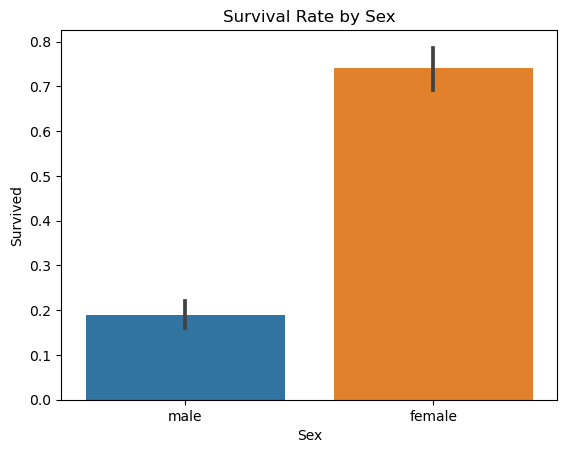

In [ ]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Survival Rate by Sex")

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

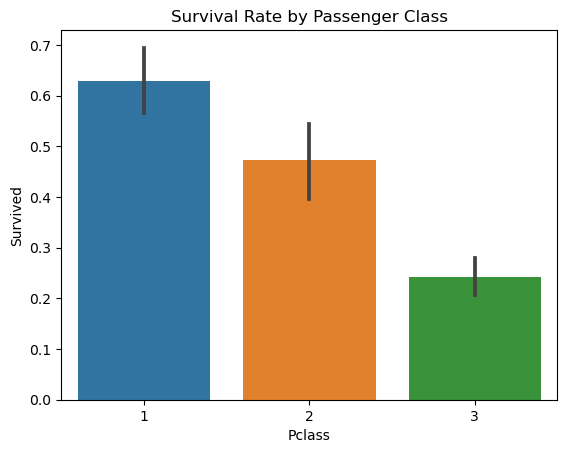

In [ ]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')

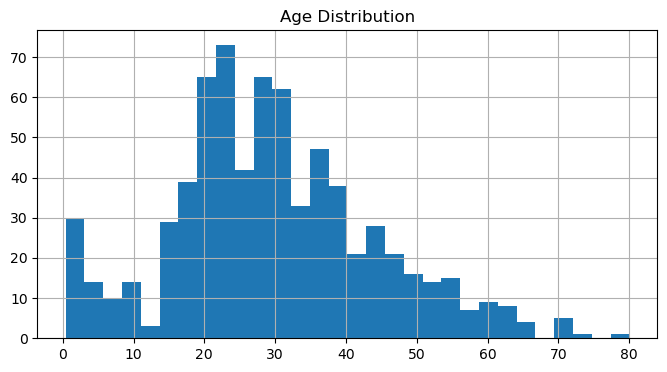

In [ ]:
df['Age'].hist(bins=30, figsize=(8,4))
plt.title('Age Distribution')
plt.show()

# 탑승자 중에는 대부분 20-30대이며, 아주 갓난 아이도 꽤 많다.

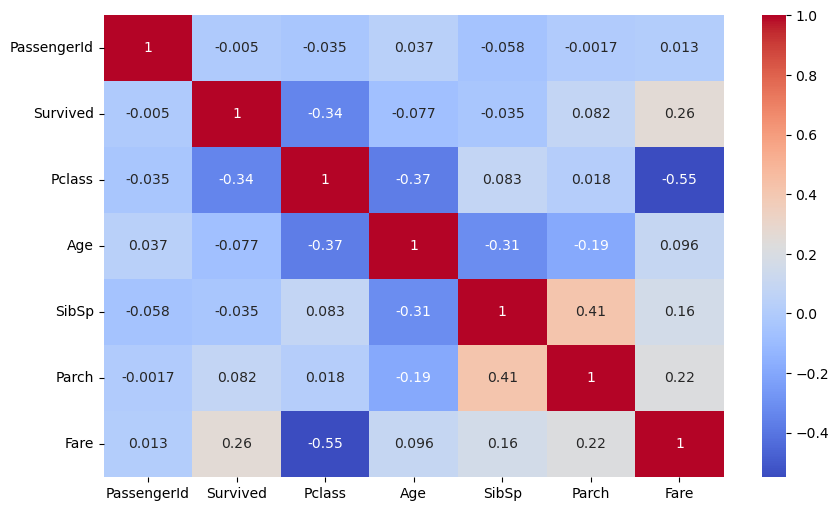

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Survived(생존)과 Fare는 양의 상관을 보인다. 즉, 요금이 높을 수록=객실 등급이 낮을 수록 생존할 가능성이 높다.

Text(0.5, 1.0, 'Survival Rate by Embarked')

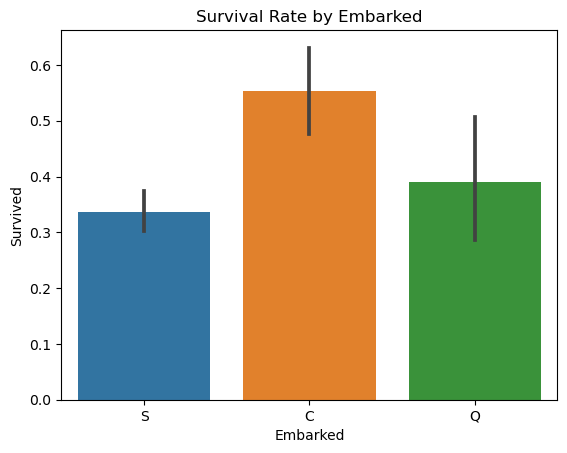

In [16]:
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked')

In [ ]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

# 1,2등급 객실의 여자 승객은 거의 대부분 생존했다. 그에 비해 남성은 1등급 객실이어도 여자만큼 많이 생존하지 못했다.

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Fare'>

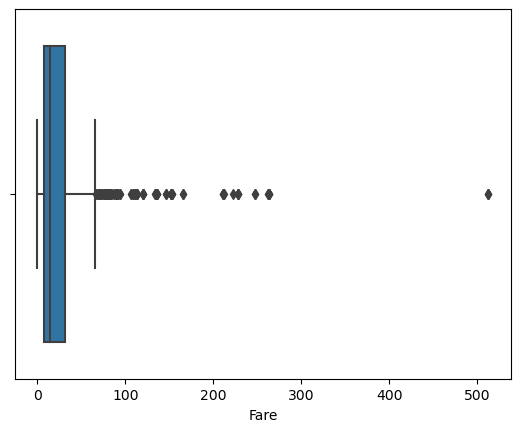

In [18]:
sns.boxplot(data=df, x='Fare')

In [ ]:
# Title(호칭) 변수 생성
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.') # 공백으로 시작하고 .로 끝나는 영문자 조합 찾아 추출
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Major         2
Col           2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [25]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [27]:
print(df[['Title', 'Age']])

    Title   Age
0      Mr  22.0
1     Mrs  38.0
2    Miss  26.0
3     Mrs  35.0
4      Mr  35.0
..    ...   ...
886   Rev  27.0
887  Miss  19.0
888  Miss   NaN
889    Mr  26.0
890    Mr  32.0

[891 rows x 2 columns]


In [29]:
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
print(df[['Title', 'Age']])

    Title   Age
0      Mr  22.0
1     Mrs  38.0
2    Miss  26.0
3     Mrs  35.0
4      Mr  35.0
..    ...   ...
886   Rev  27.0
887  Miss  19.0
888  Miss  21.0
889    Mr  26.0
890    Mr  32.0

[891 rows x 2 columns]


In [32]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df[['Cabin','HasCabin']]

,Cabin,HasCabin
0,NaN,0
1,C85,1
2,NaN,0
3,C123,1
4,NaN,0
...,...,...
886,NaN,0
887,B42,1
888,NaN,0
889,C148,1


In [42]:
print(df.dtypes)

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
FamilySize          int64
IsAlone             int32
HasCabin            int32
Sex_male            uint8
Title_Col           uint8
Title_Countess      uint8
Title_Don           uint8
Title_Dr            uint8
Title_Jonkheer      uint8
Title_Lady          uint8
Title_Major         uint8
Title_Master        uint8
Title_Miss          uint8
Title_Mr            uint8
Title_Mrs           uint8
Title_Rev           uint8
Title_Sir           uint8
Embarked_Q          uint8
Embarked_S          uint8
dtype: object


In [ ]:
#### Logistic Regression ####

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'HasCabin', 'Title']

## 범주형 one-hot encoding
# 지정한 컬럼을 각각의 값에 맞는 개별 컬럼으로 쪼개어 1,0 코딩
# 실행 후 원본 컬럼은 삭제되고 Sex_male 등 새로운 컬럼들로 교체된다.
df = pd.get_dummies(df, columns=['Sex','Title','Embarked'], drop_first=True) # drop_first=True는 각 변수 첫번째 카테고리 삭제. ex) 남자/여자: 여자 컬럼만 생성.

In [44]:
print(df.iloc[:5, -20:])

  Cabin  FamilySize  IsAlone  HasCabin  Sex_male  Title_Col  Title_Countess  \
0   NaN           2        0         0         1          0               0   
1   C85           2        0         1         0          0               0   
2   NaN           1        1         0         0          0               0   
3  C123           2        0         1         0          0               0   
4   NaN           1        1         0         1          0               0   

   Title_Don  Title_Dr  Title_Jonkheer  Title_Lady  Title_Major  Title_Master  \
0          0         0               0           0            0             0   
1          0         0               0           0            0             0   
2          0         0               0           0            0             0   
3          0         0               0           0            0             0   
4          0         0               0           0            0             0   

   Title_Miss  Title_Mr  Title_Mrs  Ti

In [49]:
from sklearn.model_selection import train_test_split

# 기존의 features 내 컬럼이 삭제되었으므로 업데이트
features = [
    'Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'HasCabin', # 수치형
    'Sex_male', # Sex에서 변환됨 (female은 기준점으로 제외됨)
    'Title_Miss', 'Title_Mr', 'Title_Mrs' # Title에서 변환됨 (Master 등은 제외됨)
]

X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7877094972067039